# Data Preprocessing and Visualization

## Motivation

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

**Attribute Information**: 11 (clinical) features + label (classification problem)
1. `Age` <br>
    Age of the patient 
2. `Sex` <br>
    - `Male`
    - `Female`
3. `ChestPainType` <br>
    Angina is a type of chest pain caused by reduced blood flow to the heart. <br> 
    - `TA`: Typical Angina - consists of (1) Substernal chest pain or discomfort that is (2) provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both).
    - `ATA`: Atypical Angina - applies when 2 out of 3 criteria of classic angina are present
    - `NAP`: Non-Anginal Pain - Meets 1 or none of the characteristics
    - `ASY`: Asymptomatic
4. `RestingBP` <br>
    (Systolic) resting blood pressure measured in mm Hg. Systolic pressure refers to the blood pressure in the arteries that results when the heart contracts or beats, pushing blood out. When the heart relaxes between beats, blood pressure in the arteries falls. This is the diastolic pressure (it is lower). Normal blood pressure is less than 120 mmHg systolic and 80 mmHg diastolic. 
5. `Cholesterol` <br>
    Serum Cholesterol measured in mg/dl. It represents the amount of total cholesterol in the blood, comprising the amount of high-density lipoprotein (HDL), low-density lipoprotein (LDL), and (20% of) triglycerides in the blood. For people aged 20 years and older, the serum cholesterol level should be between 125 and 200 mg/dL.
6. `FastingBS` <br>
    Fasting Blood Sugar measured in mg/dl - blood sugar after an overnight fast (not eating). A fasting blood sugar level less than 100 is normal, 100 to 125 mg/dL indicates prediabetes, and 126 mg/dL or higher indicates diabetes.
    - `1`: if FastingBS > 120 (prediabates or diabetes)
    - `0`: otherwise
7. `RestingECG` <br>
    - `Normal`: normal
    - `ST`: having ST-T wave abnormality - may indicate myocardial ischemia, hypertrophy or inflammation of the heart.
    - `LVH`: showing probable or definite left ventricular hypertrophy by Estes' criteria. It is an enlargement and thickening (hypertrophy) of the walls of the heart's main pumping chamber (left ventricle). The thickened heart wall loses elasticity, and, eventually, the heart may fail to pump blood from the rest of the body with as much force as needed.
8. `MaxHR` <br>
    Maximum heart rate achieved numeric value between 60 and 202 bpm). We can calculate our maximum heart rate by subtracting our age from 220. For example, if a person is 45 years old, subtract 45 from 220 to get a maximum heart rate of 175.
9. `ExerciseAngina` <br>
    Exercise-induced angina
    - `Y`: yes
    - `N`: no
10. `Oldpeak` <br>
    oldpeak = ST depression induced by exercise relative to rest (Numeric value measured in depression). ST depression is a trace in the ST segment that is abnormally low below the baseline.
11. `ST_Slope` <br>
    - `Up`: upsloping (normal)
    - `Flat`: flat 
    - `Down`: downsloping
12. `HeartDisease`: output class <br>
    - `1`: heart disease
    - `0`: normal

## Import libraries and data

In [39]:
#Import libraries
library(dplyr) #datamanipulation
install.packages('corrgram')
library(corrgram)
library(ggplot2) #data visualization
library(caret) #train and test data split

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘corrgram’


The following object is masked from ‘package:lattice’:

    panel.fill




In [2]:
#Import data
heart <- read.csv(file.path('Data/heart.csv'))

head(heart)
summary(heart)
any(is.na(heart))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


      Age            Sex            ChestPainType        RestingBP    
 Min.   :28.00   Length:918         Length:918         Min.   :  0.0  
 1st Qu.:47.00   Class :character   Class :character   1st Qu.:120.0  
 Median :54.00   Mode  :character   Mode  :character   Median :130.0  
 Mean   :53.51                                         Mean   :132.4  
 3rd Qu.:60.00                                         3rd Qu.:140.0  
 Max.   :77.00                                         Max.   :200.0  
  Cholesterol      FastingBS       RestingECG            MaxHR      
 Min.   :  0.0   Min.   :0.0000   Length:918         Min.   : 60.0  
 1st Qu.:173.2   1st Qu.:0.0000   Class :character   1st Qu.:120.0  
 Median :223.0   Median :0.0000   Mode  :character   Median :138.0  
 Mean   :198.8   Mean   :0.2331                      Mean   :136.8  
 3rd Qu.:267.0   3rd Qu.:0.0000                      3rd Qu.:156.0  
 Max.   :603.0   Max.   :1.0000                      Max.   :202.0  
 ExerciseAngina     

[1] FALSE

**Conclusions:**
Looking at the summary of our data set, it appears that there may be some zero values for the RestingBP and Cholesterol variables and it is impossible to have these clinical measures with a zero value. There isn't any NA or missing values within our dataset. However, there may be outliers/missings in Cholesterol and Resting BP being presented as zero. Oldpeak has negative values, which should be positive (same type of measurement depression). Moreover, the interquartile range of MaxHR suggests that there maybe outliers from Min to 1st quartile.

## Data preprocessing

In [3]:
#First put Oldpeak column with only positive values
heart$Oldpeak <- abs(heart$Oldpeak)

Outlier detection the interquartile range (IQR) criterion (for more:https://statsandr.com/blog/outliers-detection-in-r/).

In [4]:
#For Cholesterol - we are expecting outliers from 0 values - 183 were found
chol_out <- boxplot.stats(heart$Cholesterol)$out
chol_out_ind <- which(heart$Cholesterol %in% c(chol_out))
#chol_out

#For RestingBP - we are expecting outliers from 0 values - 28 were found
rbp_out <- boxplot.stats(heart$RestingBP)$out
rbp_out_ind <- which(heart$RestingBP %in% c(rbp_out))
#rbp_out

#For MaxHR - we are expecting outliers from  the IQR - 2 were found
mhr_out <- boxplot.stats(heart$MaxHR)$out
mhr_out_ind <- which(heart$MaxHR %in% c(mhr_out))
#mhr_out

#Let's also check for Oldpeak .
op_out <- boxplot.stats(heart$Oldpeak)$out
op_out_ind <- which(heart$Oldpeak %in% c(op_out))
#op_out

[1] "Outliers: 468, 518, 412, 529, 466, 603, 491, 0, 458, 564, 417, 409"

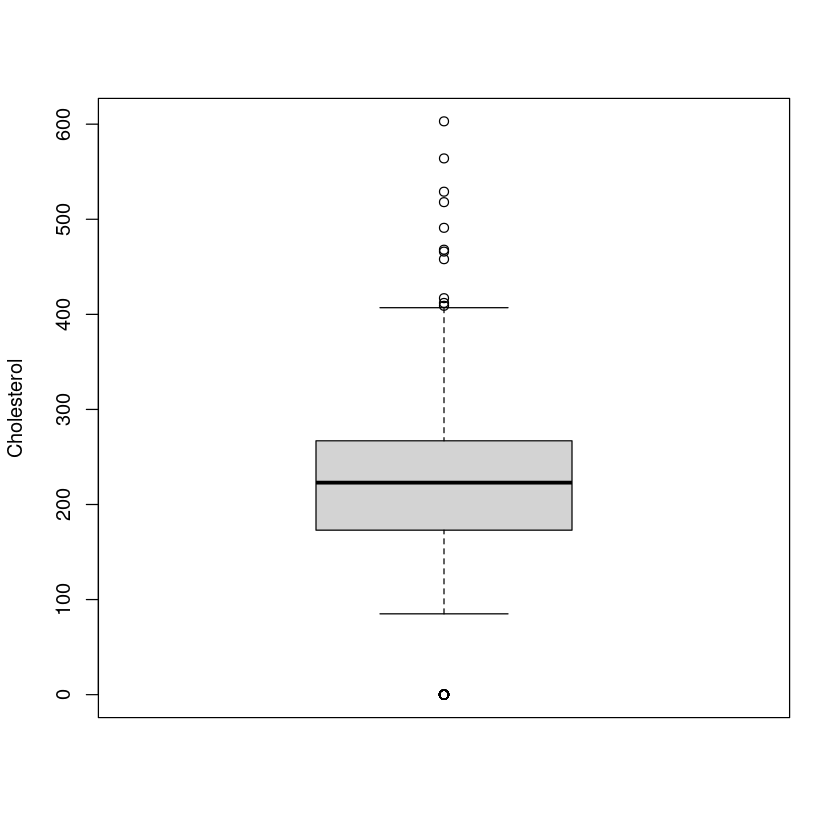

[1] "Outliers: 190, 180, 200, 80, 185, 0, 178, 172, 174, 192"

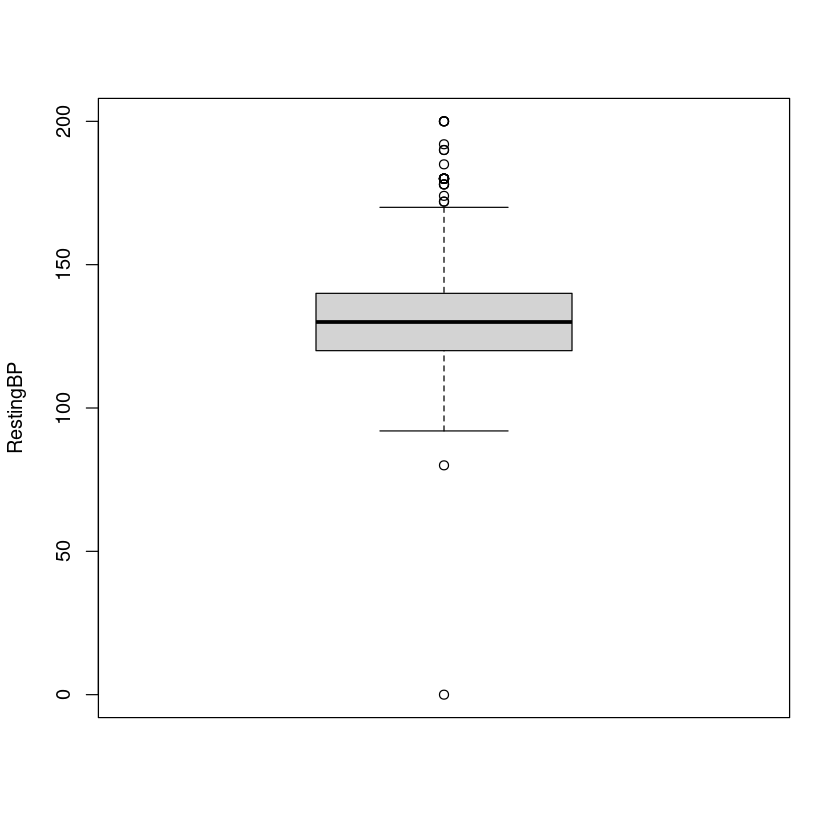

[1] "Outliers: 63, 60"

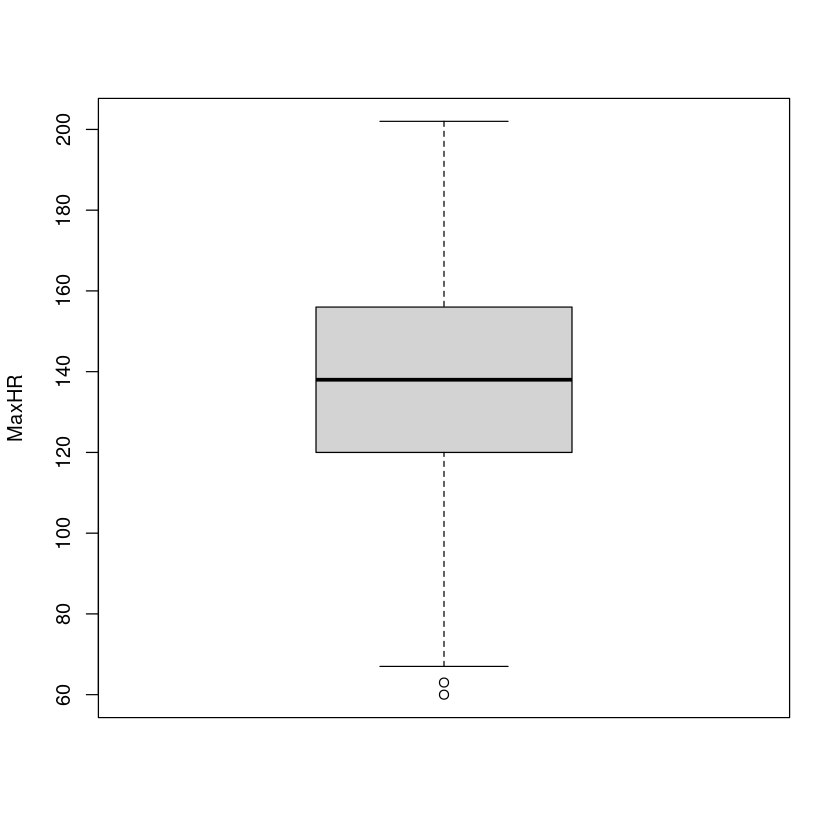

[1] "Outliers: 4, 5, 4.2, 5.6, 3.8, 6.2, 4.4"

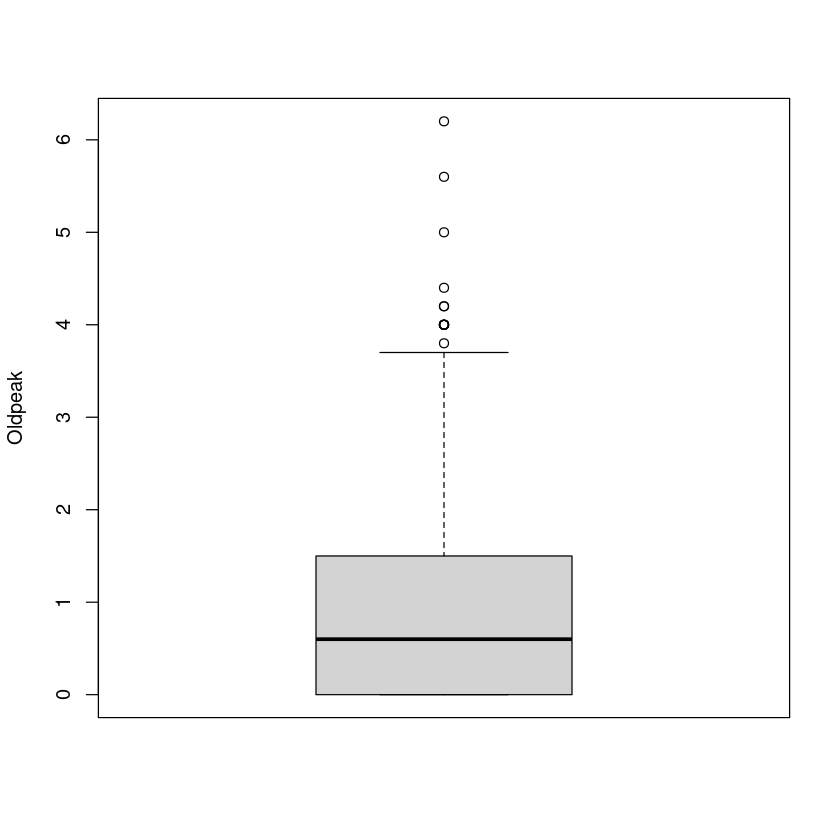

In [5]:
#Plot boxpblots to check the outliers
boxplot(heart$Cholesterol, ylab = "Cholesterol")
paste0("Outliers: ", paste(unique(chol_out), collapse = ", "))

boxplot(heart$RestingBP, ylab = "RestingBP")
paste0("Outliers: ", paste(unique(rbp_out), collapse = ", "))

boxplot(heart$MaxHR, ylab = "MaxHR")
paste0("Outliers: ", paste(unique(mhr_out), collapse = ", "))

boxplot(heart$Oldpeak, ylab = "Oldpeak")
paste0("Outliers: ", paste(unique(op_out), collapse = ", "))

Cleaning the data: We will remove the  outliers.

In [6]:
paste0('Dataset size before data processing: ', nrow(heart), 'observations.')
#We need to remove data with values outliers.
data <- heart[-unique(c(chol_out_ind,rbp_out_ind,mhr_out_ind,op_out_ind)),]
paste0('Dataset size  after removing outliers: ', nrow(data), ' observations.')

[1] "Dataset size before data processing: 918observations."

[1] "Dataset size  after removing outliers: 702 observations."

In [7]:
head(data)
summary(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


      Age            Sex            ChestPainType        RestingBP    
 Min.   :28.00   Length:702         Length:702         Min.   : 92.0  
 1st Qu.:46.00   Class :character   Class :character   1st Qu.:120.0  
 Median :54.00   Mode  :character   Mode  :character   Median :130.0  
 Mean   :52.72                                         Mean   :131.6  
 3rd Qu.:59.00                                         3rd Qu.:140.0  
 Max.   :77.00                                         Max.   :170.0  
  Cholesterol      FastingBS       RestingECG            MaxHR      
 Min.   : 85.0   Min.   :0.0000   Length:702         Min.   : 71.0  
 1st Qu.:206.0   1st Qu.:0.0000   Class :character   1st Qu.:122.0  
 Median :235.0   Median :0.0000   Mode  :character   Median :140.0  
 Mean   :239.7   Mean   :0.1624                      Mean   :140.5  
 3rd Qu.:272.0   3rd Qu.:0.0000                      3rd Qu.:160.0  
 Max.   :404.0   Max.   :1.0000                      Max.   :202.0  
 ExerciseAngina     

Now it makes more sense. Let's convert categorical features (characters) to factors.

In [8]:
# we have 5 numerical fetures: Age, RestingBP, Cholesterol, MaxHR, and Oldpeak
# We have 6 categorical features + class: Sex, ChestPainType, FastingBS, RestingECG, 
                                          #Exercise Angina, and ST_Slope + HeartDisease

data$HeartDisease <- as.factor(data$HeartDisease)
data$Sex <- as.factor(data$Sex)
data$ChestPainType <- as.factor(data$ChestPainType)
data$FastingBS <- as.factor(data$FastingBS)
data$RestingECG <- as.factor(data$RestingECG)
data$ExerciseAngina <- as.factor(data$ExerciseAngina)
data$ST_Slope <- as.factor(data$ST_Slope)
  
row.names(data) <- NULL

In [9]:
head(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [10]:
summary(data)

      Age        Sex     ChestPainType   RestingBP      Cholesterol   
 Min.   :28.00   F:168   ASY:340       Min.   : 92.0   Min.   : 85.0  
 1st Qu.:46.00   M:534   ATA:160       1st Qu.:120.0   1st Qu.:206.0  
 Median :54.00           NAP:163       Median :130.0   Median :235.0  
 Mean   :52.72           TA : 39       Mean   :131.6   Mean   :239.7  
 3rd Qu.:59.00                         3rd Qu.:140.0   3rd Qu.:272.0  
 Max.   :77.00                         Max.   :170.0   Max.   :404.0  
 FastingBS  RestingECG      MaxHR       ExerciseAngina    Oldpeak      
 0:588     LVH   :165   Min.   : 71.0   N:439          Min.   :0.0000  
 1:114     Normal:422   1st Qu.:122.0   Y:263          1st Qu.:0.0000  
           ST    :115   Median :140.0                  Median :0.4000  
                        Mean   :140.5                  Mean   :0.8312  
                        3rd Qu.:160.0                  3rd Qu.:1.5000  
                        Max.   :202.0                  Max.   :3.6000  

- On the `Sex` summary, we can see that we have an unbalanced dataset for this feature, with 76% of the samples belonging to male sex.
- Based on `ChestPainType` summary, almost half (48%) of patients are assymptomatic.
- Based on `FastingBS` summary,  we can see that we have a highly unbalanced dataset for this feature, with 84% of patients have a value of fasting blood sugar below 120 (normal condition).
- Based on `RestingECG` summary, most of patients (60%) have a normal resting ECG result.
- From the `ST_Slope` summary, we can see that only few patients have a downsloping ST: 63 out of 918. Flat (pathological contidion) and Up (normal condition) are balanced between each other.
- On the `HeartDisease` summary, which is the target attribute, the category distribution is balanced. :)

## Create testing and training datasets

**Why do this now?**
I am doing this here because the models will lear from the training data, so we should visualize only the training data. The testing data will be used for performance evaluation of the machine learning models. Moreover, when visualizing the explanations, we can check the relation of train-train data and train-test data and see if it is what is expected.

In [11]:
inTraining <- createDataPartition(data$HeartDisease, p = .75, list = FALSE)
training <- data[ inTraining,]
testing  <- data[-inTraining,]

In [12]:
print(c('size train test: ', nrow(training), nrow(testing)))

[1] "size train test: " "527"               "175"              


In [13]:
print(c('train:', '0:' , colSums(training == 0)[12], ', 1:' , colSums(training == 1)[12]))

                          HeartDisease              HeartDisease 
    "train:"         "0:"        "283"       ", 1:"        "244" 


In [14]:
print(c('test:', '0:' , colSums(testing == 0)[12], ', 1:' , colSums(testing == 1)[12]))

                          HeartDisease              HeartDisease 
     "test:"         "0:"         "94"       ", 1:"         "81" 


In [63]:
head(training)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [19]:
#Save cleaned data and Save training + testing datasets
write.csv(data, "Data/data.csv", row.names=FALSE, quote=FALSE) 
write.csv(training, "Data/training.csv", row.names=FALSE, quote=FALSE) 
write.csv(testing, "Data/testing.csv", row.names=FALSE, quote=FALSE) 

## (Training) Data Visualization

### Categorical features - EDA

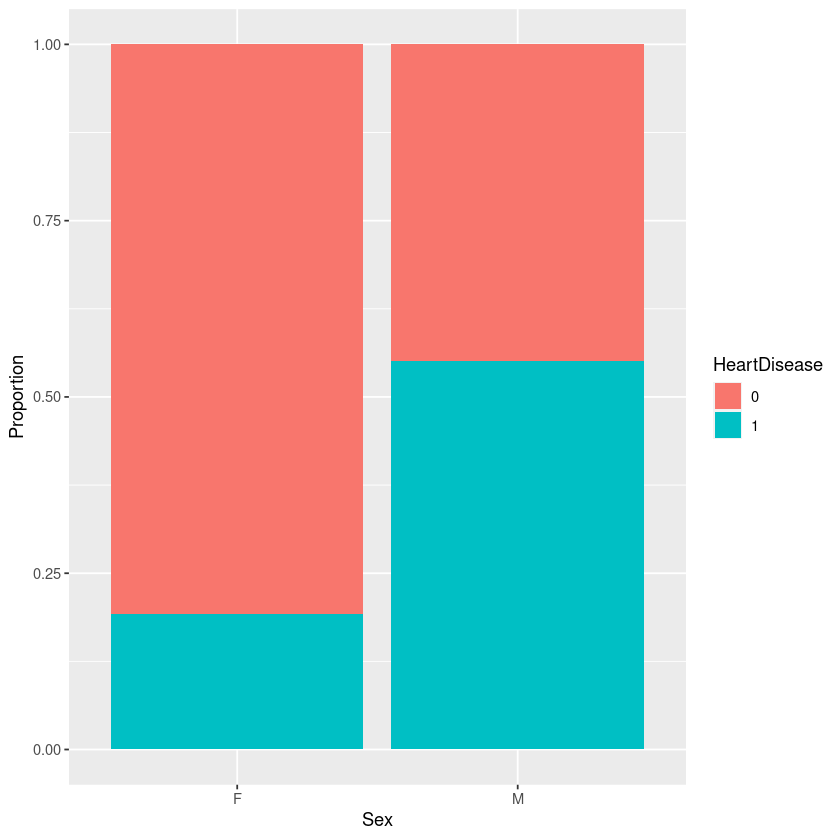

In [20]:
# stacked bar chart
ggplot(training, 
       aes(x = Sex, 
           fill = HeartDisease)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

**Conclusions:**
- In male patients the number of patients with heart disease is higher than normal patients, which is the opposite of what we see in female patients.

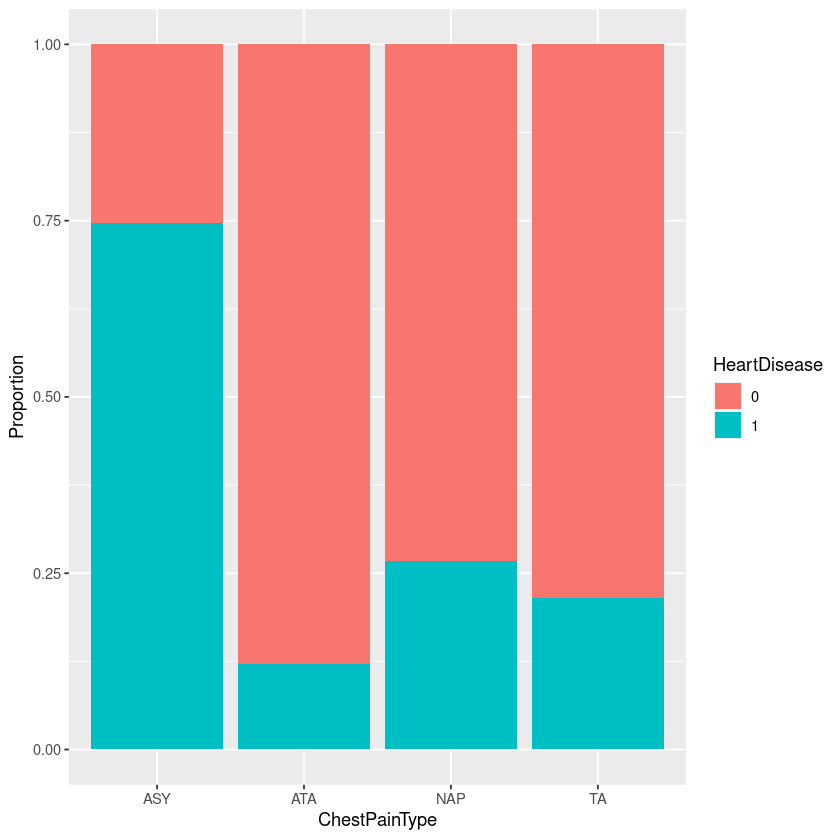

In [22]:
# stacked bar chart
ggplot(training, 
       aes(x = ChestPainType, 
           fill = HeartDisease)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

**Conclusions:**
- Most of the heart disease patients have chest Pain with an Asymptomatic (ASY) type.

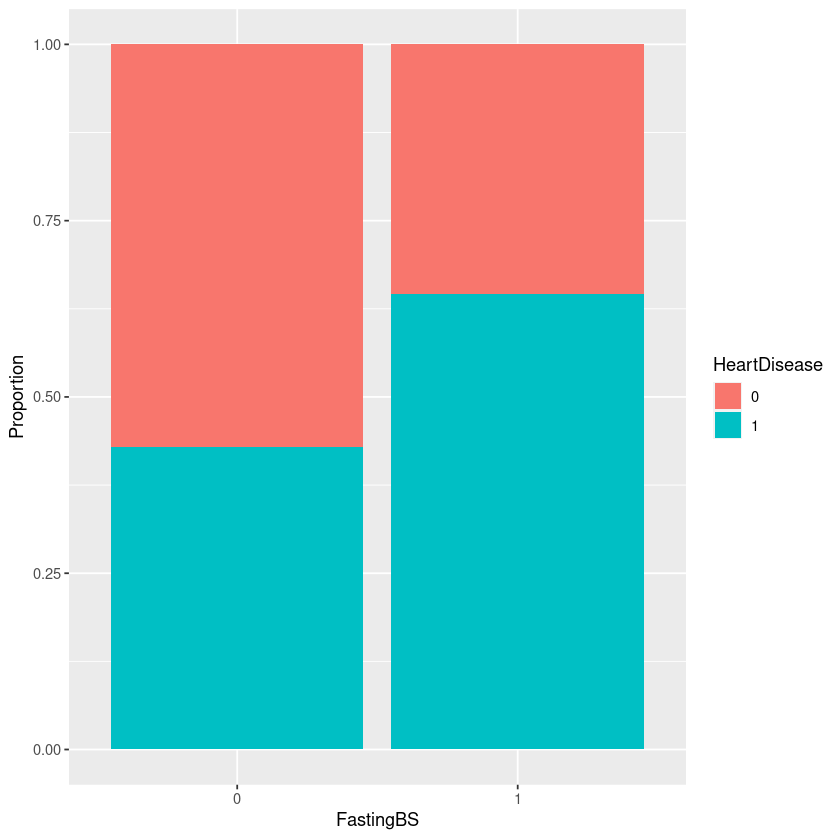

In [23]:
# stacked bar chart
ggplot(training, 
       aes(x = FastingBS, 
           fill = HeartDisease)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

 **Conclusions:**
 - For patients with fasting blood sugar > 120mg (diabetes or in risk of), around 70% of them have heart disease.

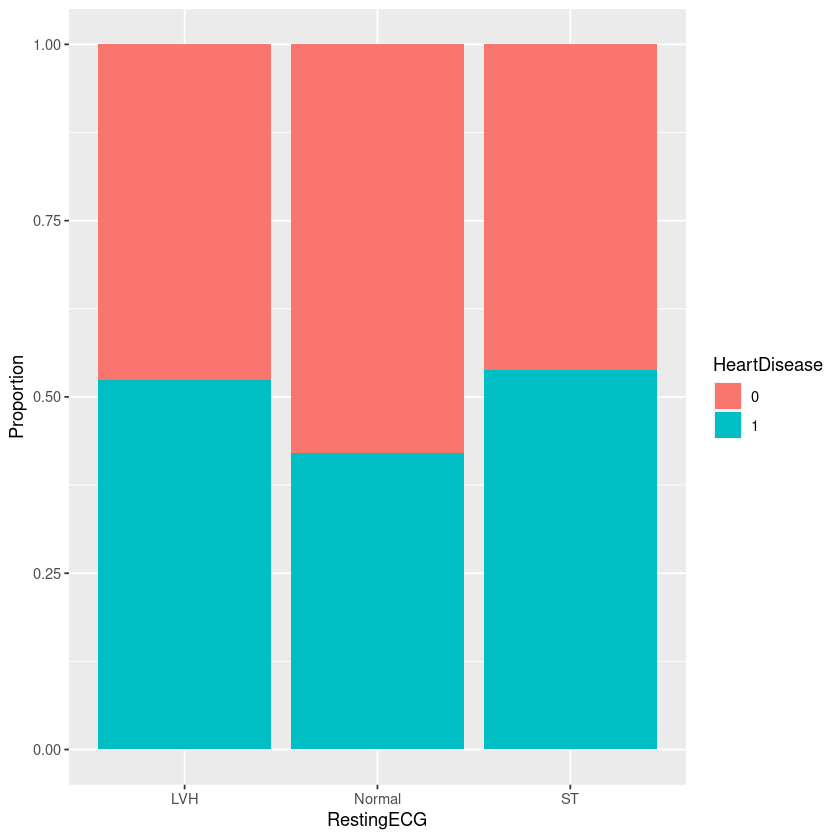

In [25]:
# stacked bar chart
ggplot(training, 
       aes(x = RestingECG, 
           fill = HeartDisease)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

**Conclusions:**
- Resting ECG does not seem to be correlated with heart disease. However, for normal restingECG results, the highest fraction belongs to the healthy patients (HeartDisease = 0).

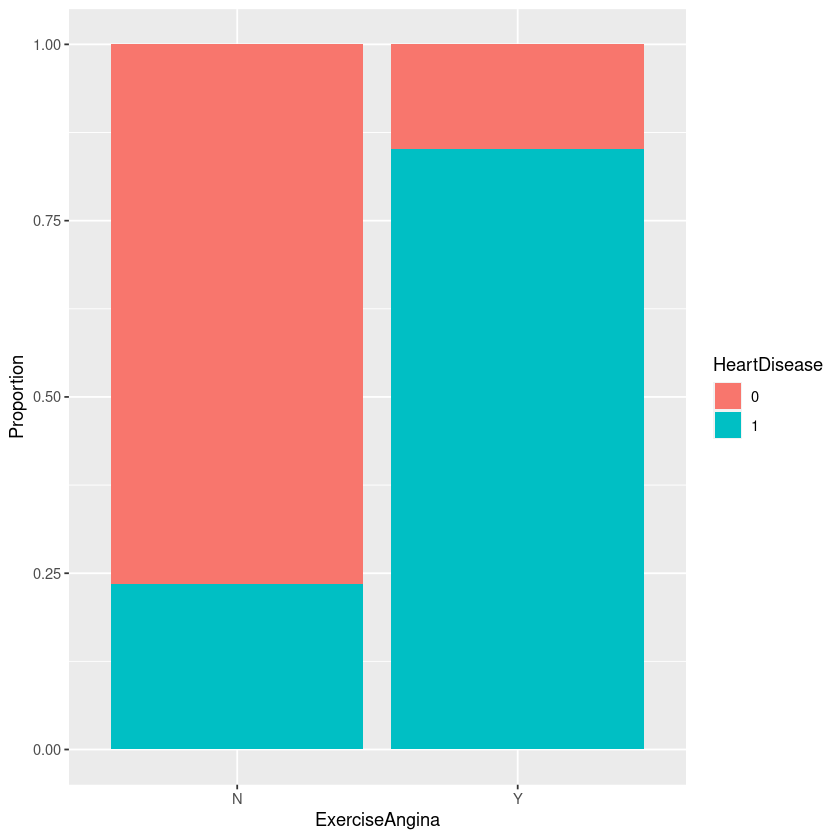

In [26]:
# stacked bar chart
ggplot(training, 
       aes(x = ExerciseAngina, 
           fill = HeartDisease)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

**Conclusions:**
- Around 85% of the patients with exercise induced agina have heart disease. There seems to be a big correlation between these two.

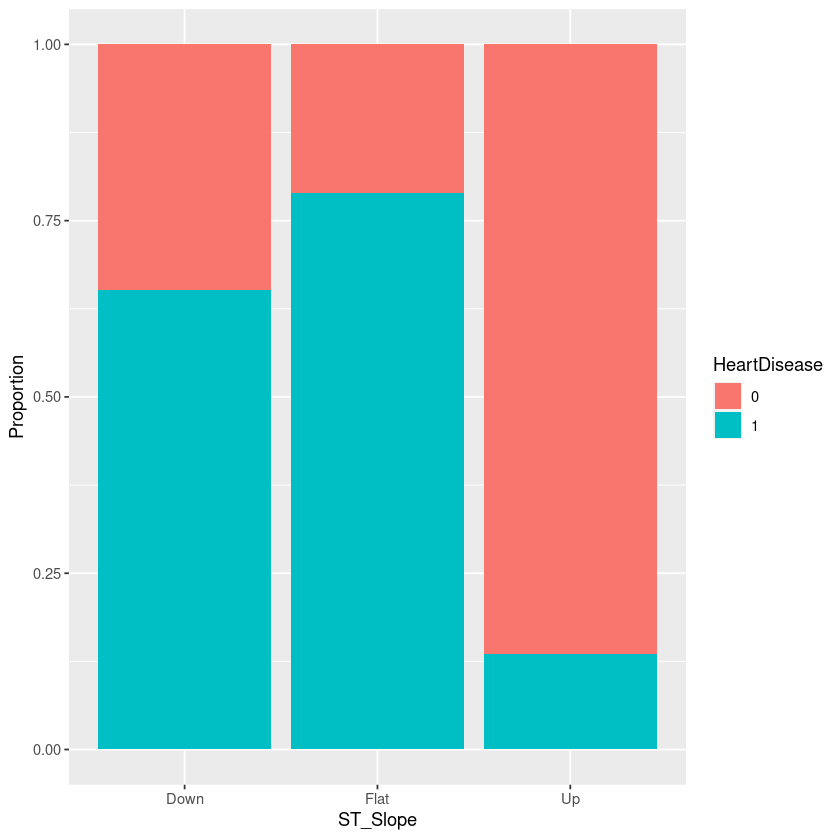

In [27]:
# stacked bar chart
ggplot(training, 
       aes(x = ST_Slope, 
           fill = HeartDisease)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

**Conclusions:**
- Having a flat (or a down) ST slope seems to be related with the presence of heart disease.

### Numerical features - EDA

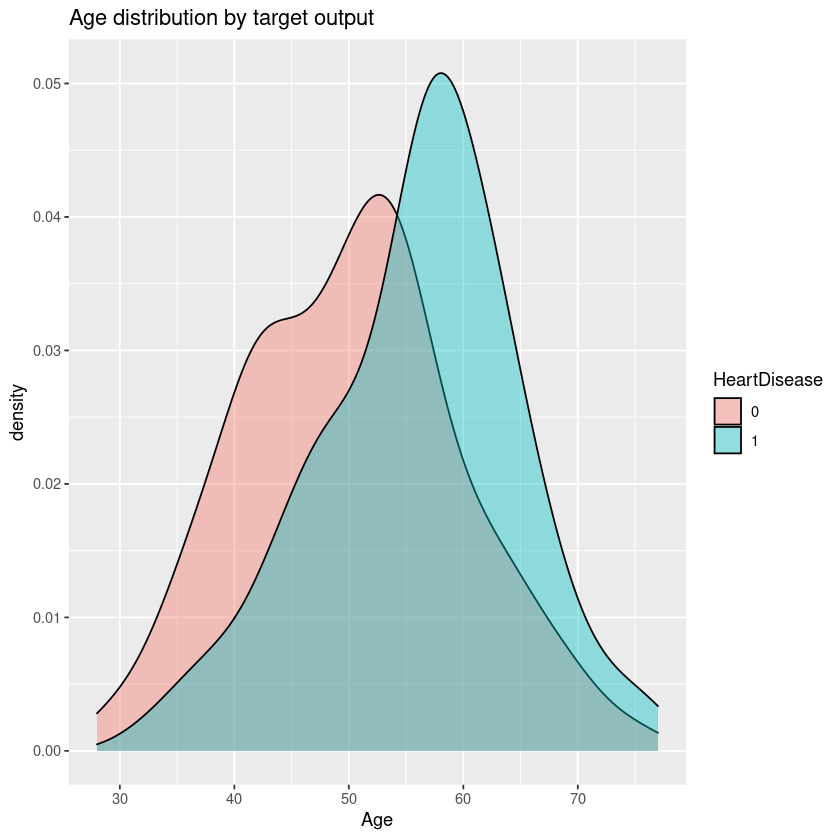

In [29]:
# by rank using kernel density plots
ggplot(training, 
       aes(x = Age, 
           fill = HeartDisease)) +
  geom_density(alpha = 0.4) +
  labs(title = "Age distribution by target output")

**Conclusions:**
- The age group of 55-65 have maximum heart failures.

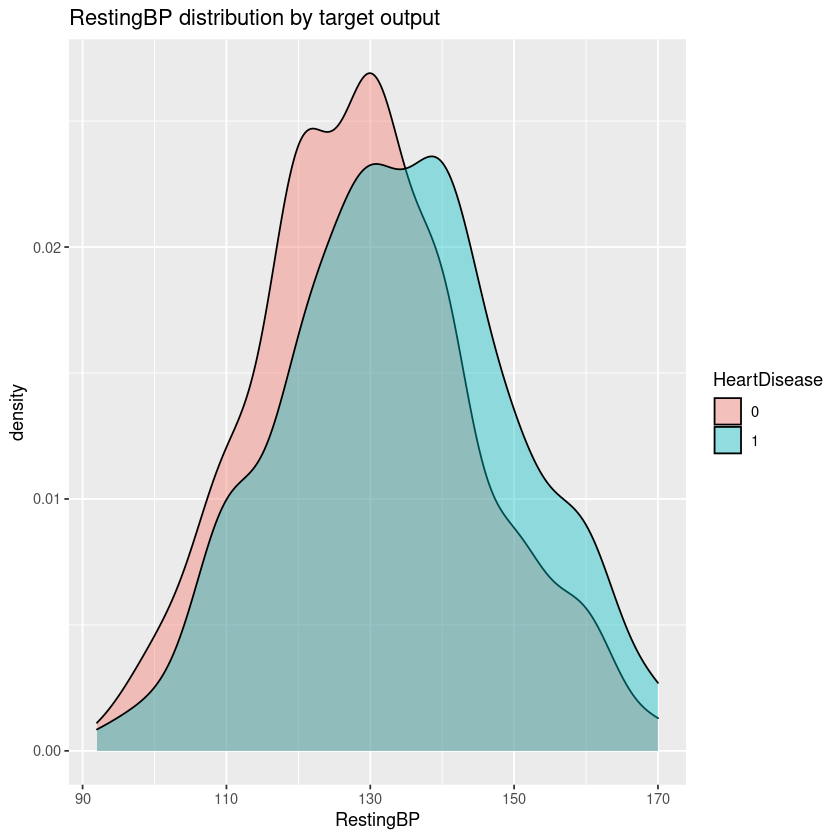

In [30]:
# by rank using kernel density plots
ggplot(training, 
       aes(x = RestingBP, 
           fill = HeartDisease)) +
  geom_density(alpha = 0.4) +
  labs(title = "RestingBP distribution by target output")

**Conclusions:**
- Patients with heart disease seem to hava a (systolic) resting BP a bit higher.

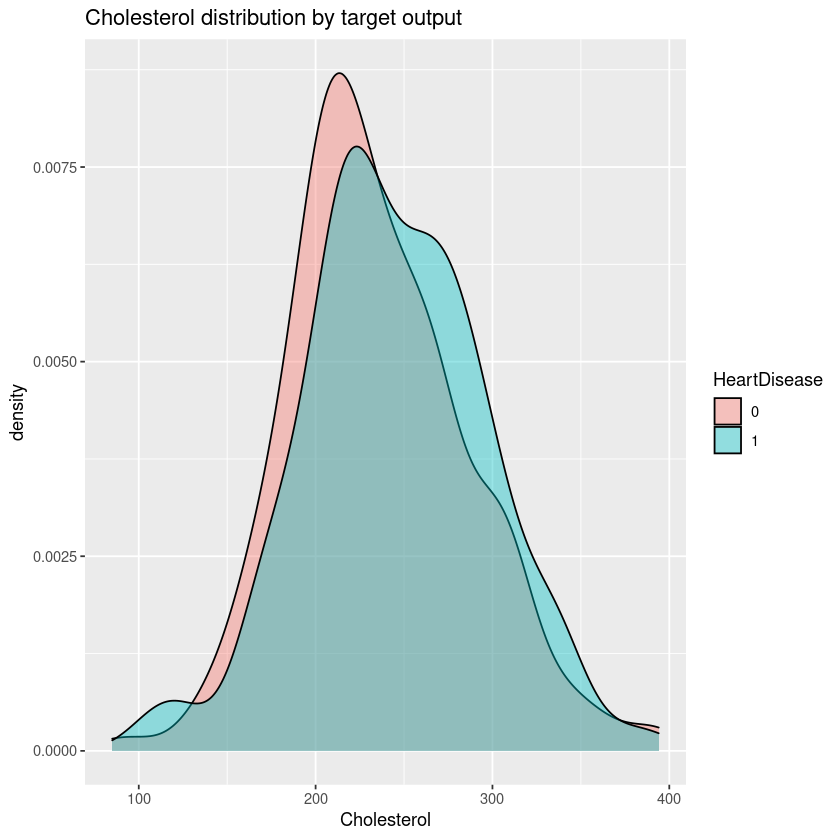

In [31]:
# by rank using kernel density plots
ggplot(training, 
       aes(x = Cholesterol, 
           fill = HeartDisease)) +
  geom_density(alpha = 0.4) +
  labs(title = "Cholesterol distribution by target output")

**Conclusions:**
- For people aged 20 years and older (which is the case), the Cholesterol level should be between 125 and 200 mg/dL. By looking at the plot, we see that cholesterol levels are much higher (for both conditions, although a bit higher for patients woth heart disease).

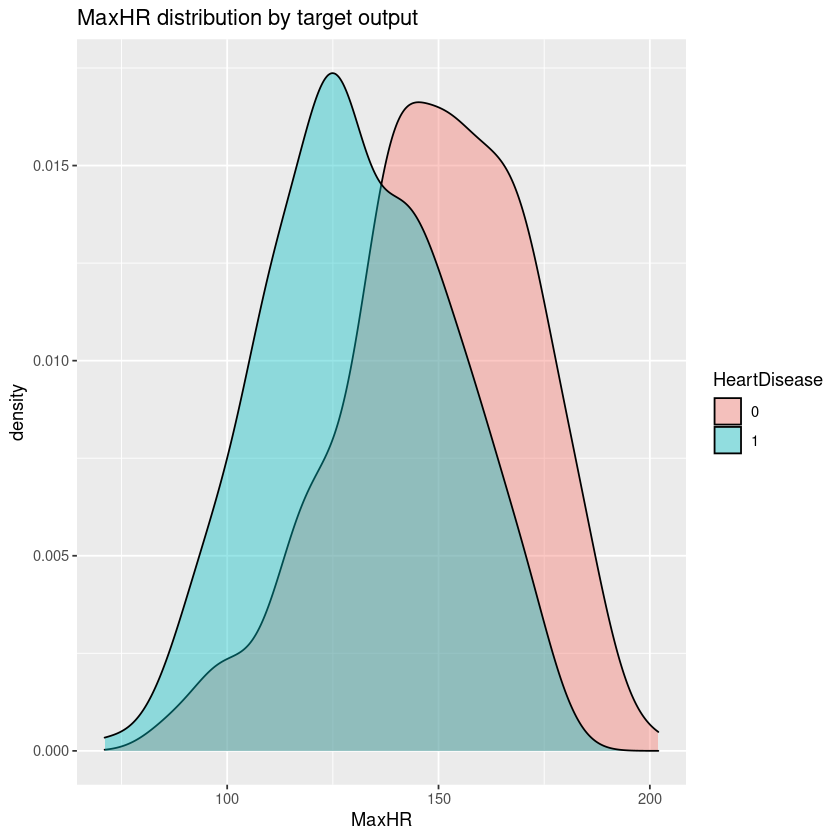

In [32]:
# by rank using kernel density plots
ggplot(training, 
       aes(x = MaxHR, 
           fill = HeartDisease)) +
  geom_density(alpha = 0.4) +
  labs(title = "MaxHR distribution by target output")

**Conclusions:**
- Average MaxHR is 140. Age average is 53 so based of the formula the MaxHR average will be around 167.
- Healthy patients seem to have a higher MaxHR on average than people with heart disease.

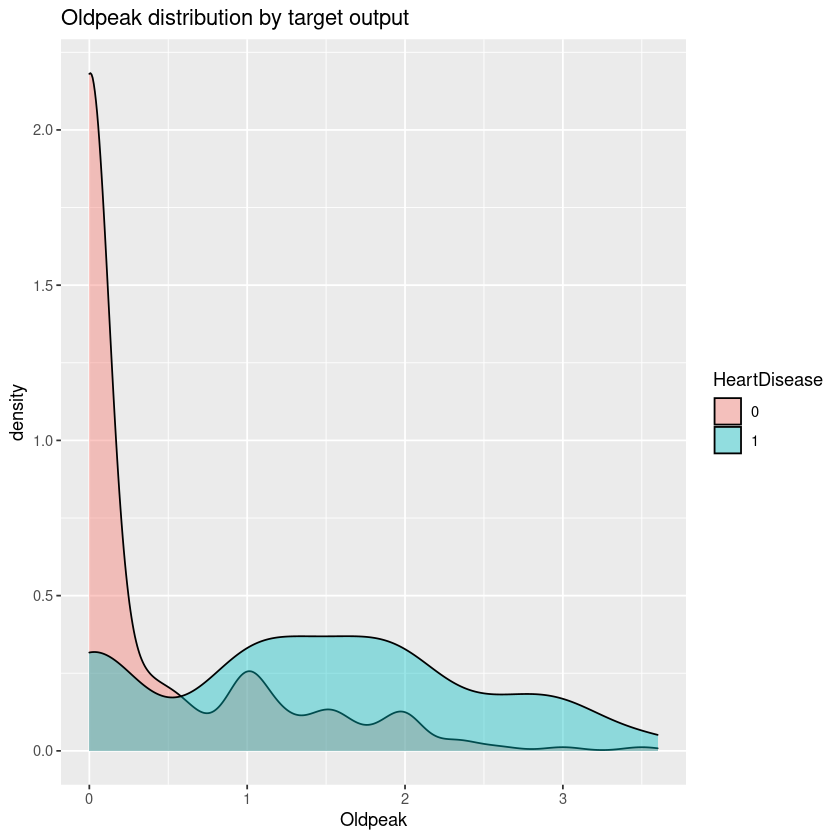

In [34]:
# by rank using kernel density plots
ggplot(training, 
       aes(x = Oldpeak, 
           fill = HeartDisease)) +
  geom_density(alpha = 0.4) +
  labs(title = "Oldpeak distribution by target output")

In [38]:
nrow(training[training$Oldpeak<0.5,])
nrow(training[training$Oldpeak>=0.5,])

[1] 262

[1] 265

**Conclusions:**
- Most patients with no heart disease have an oldpeak value between 0 and 0.5.
- For patients with heart disease, the distribution of the values seems to be regular between the range of values for this feature. We see values above 0.5 which indicate heart disease.
- This plot indicates that the distribution of the variable is skewed to the right (class 0).

### Correlation matrix

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

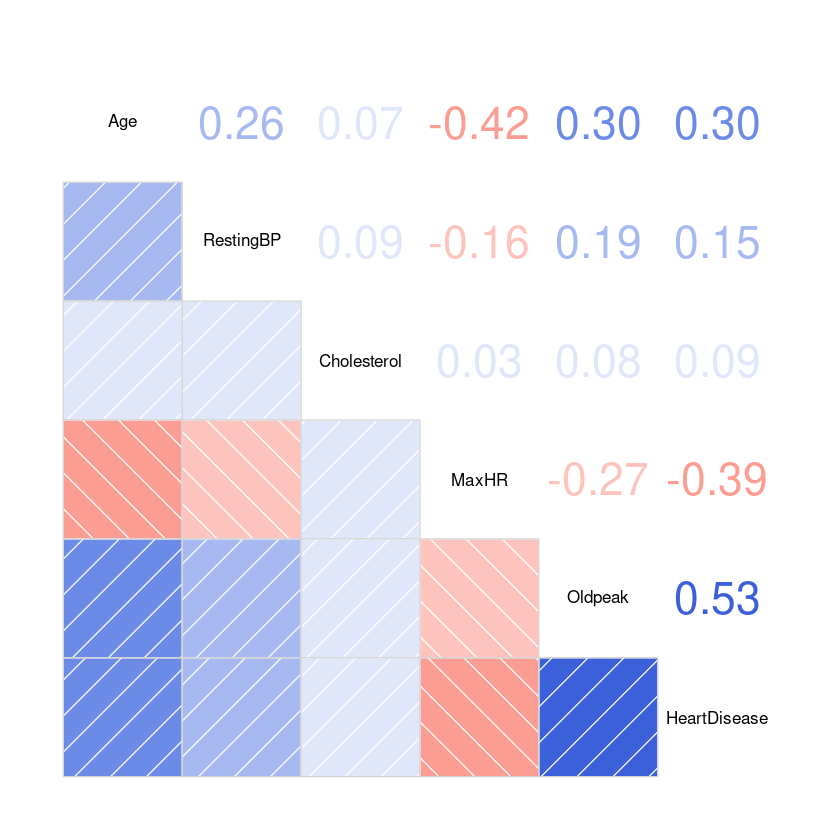

In [60]:
aux <- training
aux$HeartDisease <- as.integer(training$HeartDisease)
corrgram(aux, upper.panel = panel.cor)

**Conclusions:**
- Looking at this correlogram, it appears that MaxHR, Age, and Oldpeak have significant correlation in determining whether a person has high risk for Heart Disease. This is only for numerical values, and to be complemented with the previous plots.